In [1]:
import torch
from torch import nn as nn
from torch.utils.data import DataLoader, Dataset
from torch import optim 
import matplotlib.pyplot as plt
from torch.nn import functional
from torchvision.datasets import ImageFolder
from torchvision import transforms,models
import matplotlib.pyplot as plt

In [2]:
class dataset(Dataset):
    def __init__(self, path):
        self.dataset = torch.tensor(pd.read_csv(path).values)
    
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, index):
        return self.dataset[index, :-1], self.dataset[index, -1]

In [3]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3, 32, kernel_size= 3, padding = 1)
        self.pool1 = nn.MaxPool2d(2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(2)
        
        self.flatten = nn.Flatten()
        
        self.fc1 = nn.Linear(128*28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128,1)
    
    def forward(self, x):
        out = self.pool1(functional.relu(self.conv1(x)))
        out = self.pool2(functional.relu(self.conv2(out)))
        out = self.pool3(functional.relu(self.conv3(out)))
        
        out = self.flatten(out)
        
        out = functional.relu(self.fc1(out))
        out = functional.relu(self.fc2(out))
        out = functional.sigmoid(self.fc3(out))
        
        return out

In [4]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, test_loader, print_plot=True):
    train_accuracy = torch.zeros(n_epochs)
    test_accuracy = torch.zeros(n_epochs)
    
    for epoch in range(n_epochs):

        for example, labels in train_loader:     
            
            labels  = labels.unsqueeze(1)

            output = model(example.float())
            loss = loss_fn(output, labels.float())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            
        with torch.no_grad():
            
            for loader, accuracy in [(train_loader, train_accuracy),(test_loader, test_accuracy)]:
                correct = 0
                total = 0

                for examples, labels in loader:
                    labels = labels.view(-1, 1)

                    outputs = model(examples.float())
                    predicted = torch.round(outputs)

                    total += labels.shape[0]
                    correct += (predicted == labels).sum()

                accuracy[epoch] = correct / total
                
        print(f'Epoch {epoch+1})', 
              f'Train Accuracy: {train_accuracy[epoch]}',
              f'Test Accuracy: {test_accuracy[epoch]}')

    if print_plot:

        epochs = range(n_epochs)
        
        plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
        plt.plot(epochs, test_accuracy, 'b', label='Test accuracy')
        plt.title('Training and Test loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

In [5]:
transformations = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

train_data = ImageFolder(r'Data/archive/train', transform= transformations)
test_data = ImageFolder(r'Data/archive/test', transform= transformations)

train_loader = DataLoader(train_data, batch_size = 32, shuffle =True)
test_loader = DataLoader(test_data, batch_size = 32, shuffle =True)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 1) Train Accuracy: 0.7971179485321045 Test Accuracy: 0.7924242615699768
Epoch 2) Train Accuracy: 0.8304892182350159 Test Accuracy: 0.8166666626930237
Epoch 3) Train Accuracy: 0.8581721782684326 Test Accuracy: 0.8303030133247375
Epoch 4) Train Accuracy: 0.8850967288017273 Test Accuracy: 0.8242424130439758
Epoch 5) Train Accuracy: 0.9074705839157104 Test Accuracy: 0.8242424130439758
Epoch 6) Train Accuracy: 0.9404626488685608 Test Accuracy: 0.846969723701477
Epoch 7) Train Accuracy: 0.935912013053894 Test Accuracy: 0.8348484635353088
Epoch 8) Train Accuracy: 0.9567690491676331 Test Accuracy: 0.831818163394928
Epoch 9) Train Accuracy: 0.9836935997009277 Test Accuracy: 0.8409090638160706
Epoch 10) Train Accuracy: 0.9905195236206055 Test Accuracy: 0.8303030133247375


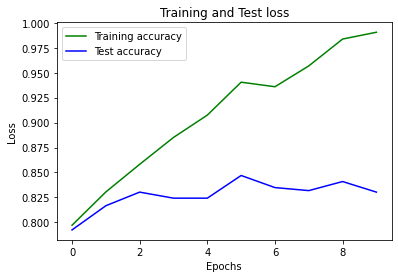

In [11]:
learning_rate = 1e-3 # 0.001

model = Net()

optimizer = optim.Adam(model.parameters(),lr = learning_rate)
loss_fn = nn.BCELoss()

training_loop(
    n_epochs = 10,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    print_plot = True,
    train_loader = train_loader,
    test_loader = test_loader
)